In this notebook I will calculate confidence intervals on an extracted sv:

In [104]:
%matplotlib inline
import numpy as np
import pandas as pd
from netCDF4 import Dataset

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import array as arr
import seaborn as sns

import inverse_method_funs as inv

In [105]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

## An example of an sv extract

"Bootstrap cinfidence inetvals are generallly accurate for 20 observations or more."-Dragicevic 2016, Fairstats\
I have 11 in a 5 minute period. Not enough

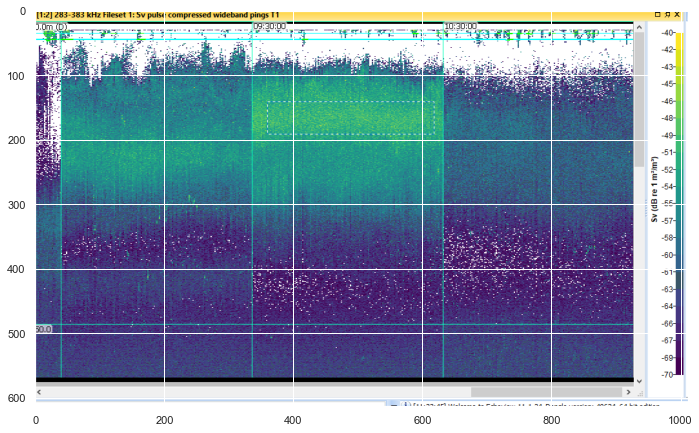

In [106]:
AM_28 = mpimg.imread('./../continuum_28AM.png')
plt.imshow(AM_28);

In [116]:
fname_EV = 'D:/GLIDER2018/Echosounder/EVexport/Wideband_frequency_response_28AM.csv'
freqs_EV, sv_EV = inv.read_widebandfrequencyresponse(fname_EV, extracols = 2)
sv_EV = np.array(sv_EV,dtype=float)
freqs_EV = np.array(freqs_EV,dtype=float)

In [151]:
def sv_smooth_ci(sv, N=1):
    """Extract mean and bootstrap a confidence interval for the mean of columns data with freq and sigmabs.
    sv: an array with one column for each curve from one continuum of targets
    freq: array with frequency intervals for each sv 
    Output is the mean sv and the bootstrap confidence intervals of the mean sv.
    """
    # First, calculate mean for each frequency of the whole sample
    median = np.median(sv, axis=1) # Benoit Bird and Waluk 2020
    
    # Running mean, first pad with N values then run
    median_padded = np.pad(median, (N//2, N-1-N//2), mode='edge')
    median_smooth = np.convolve(median_padded, np.ones(N)/N, mode='valid')
    
    # Calculate 95% CI but what is the "best" method for this data?
    ci = np.percentile(sv_EV, (2.5, 97.5), axis=1)
    #ci = np.std(sv,axis=1) * 1.95 / np.sqrt(np.shape(sv_EV)[1])
    #ci = sns.utils.ci(sv_EV, axis=1)

    return median_smooth, ci

In [159]:
median_smooth, ci = sv_smooth_ci(sv_EV, N=30)

## Plot

Text(0.5, 1.0, 'Pulse-Compressed Frequency response from a continuum of targets')

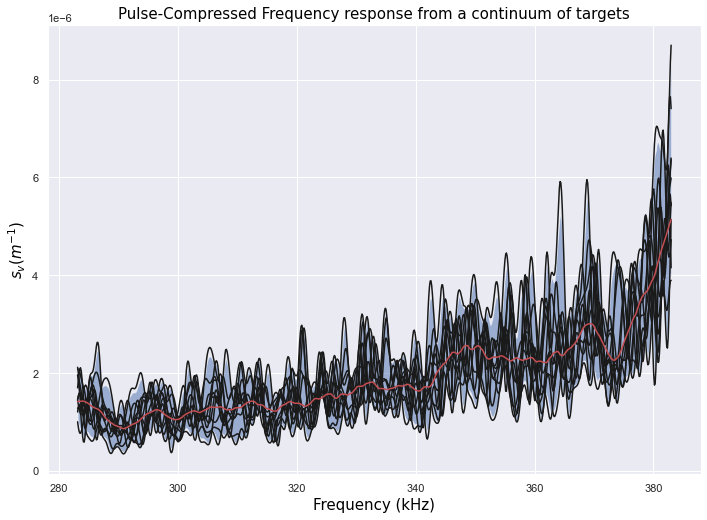

In [160]:
plt.plot(freqs_EV ,sv_EV,'k')
plt.plot(freqs_EV, median_smooth, 'r')
plt.fill_between(freqs_EV, ci[0,:], ci[1,:], alpha=0.5)
plt.ylabel('$s_{v} (m^{-1}$)', axis_font)
plt.xlabel('Frequency (kHz)', axis_font)
plt.title('Pulse-Compressed Frequency response from a continuum of targets', title_font)

In the linear form ($s_{v}$) is relativel "normal". In this case, we can use the standard deviation and dispersion internals to summarize the spread of the data. We will call it the disersion range (Greenacre 2016). I am using the 95% confidence interval. (z-score*std = 1.95*std for 95%). I am using this metric to describe the spread of the data, not the confidence in the mean.
